# 실험
1. 가설
- SentencePieces는 konlpy를 이용한 모델보다 '어느 부분'에서 뛰어난 부분이 있을 것이다. 
- SentencePieces를 이용해서 네이버 영화 리뷰 데이터를 토큰화 시킬 수 있다. 
2. 실험 과정 
- SentencePieces를 활용하는 과정을 알아보자
- SentencePieces를 이용해서 네이버 영화 리뷰 데이터를 토큰화 하자
- 감정 분석을 해보자
- SentencePieces에 변화를 주어 추가 실험을 진행하자
- konlpy를 사용한 결과와 비교해보자
3. 결론

## 0. 사전 단계
```
$ wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
$ mkdir -p ~/aiffel/sp_tokenizer/data
$ mv korean-english-park.train.tar.gz ~/aiffel/sp_tokenizer/data
$ cd ~/aiffel/sp_tokenizer/data
$ tar -xzvf korean-english-park.train.tar.gz
```

해당 데이터에 대한 설명은 다음과 같다.
`내려받은 데이터는 한국어의 형태소 분석과 품사 태깅, 기계 번역 연구를 위해 공개된 데이터입니다. 이번에 사용할 데이터는 한국어-영어 병렬을 이루는 말뭉치 중 한국어 부분으로, 전체 병렬 말뭉치는 후에 번역기를 만들며 사용할 예정입니다.`
- 참고할 만한 데이터 : https://github.com/jungyeul/korean-parallel-corpora

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 길이 분포에 대해서 알아본다.

문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


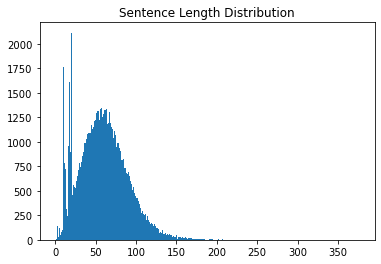

In [7]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

데이터의 특이점은, 앞부분에 이상하게 치솟는 구간이 있다는 것이다. 이 부분은 뭘까?

In [8]:
def check_sentence_with_length(raw, length):
    count = 0
    target = []
    for sen in raw:
        if len(sen) == length:
            #print(sen)
            target.append(sen)
            count += 1
    return target

target = check_sentence_with_length(raw, 1)
print(target)

['’']


In [9]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)
check_sentence_with_length(raw, 11)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


['라고 조던이 말했다.',
 '- 모르고 있습니다.',
 '- 네, 보이는군요.',
 '디즈니사만이 아니다.',
 '큰 파티는 아니지요.',
 '의자는 비어 있었다.',
 '이 일은 계속됩니다.',
 '나는 크게 실망했다.',
 '그 이유는 간단하다.',
 '이력서와 자기 소개서',
 '시대가 변하고 있다.',
 '는 돌발질문을 했다.',
 '9. 몇 분간의 명상',
 '하와이, 빅 아일랜드',
 '키스를 잘 하는 방법',
 '키스를 잘 하는 방법',
 '스피어스가 뚱뚱한가?',
 '산 위를 나는 느낌.',
 '세 시간쯤 걸었을까?',
 '(아직 읽고있습니까?',
 '처음에는 장난이었다.',
 '우리는 운이 좋았다.',
 '아기가 숨을 멈출 때',
 '건물 전체 무너져내려',
 '그녀의 아름다운 눈.',
 '대답은 다음과 같다.',
 '"사과할 것이 없다.',
 '폭탄테러가 공포 유발',
 '그는 "잘 모르겠다.',
 '그는 "잘 모르겠다.',
 '그는 "잘 모르겠다.',
 '그는 "잘 모르겠다.',
 '그는 "잘 모르겠다.',
 '그는 "잘 모르겠다.',
 '그는 "잘 모르겠다.',
 '그는 "잘 모르겠다.',
 '그는 "잘 모르겠다.',
 '케냐 야생동물 고아원',
 '경유 1200원대로…',
 '더 내려야 하는 이유',
 '케냐 야생동물 고아원',
 '경유 1200원대로…',
 '더 내려야 하는 이유',
 '케냐 야생동물 고아원',
 '경유 1200원대로…',
 '더 내려야 하는 이유',
 '케냐 야생동물 고아원',
 '경유 1200원대로…',
 '더 내려야 하는 이유',
 '케냐 야생동물 고아원',
 '경유 1200원대로…',
 '더 내려야 하는 이유',
 '케냐 야생동물 고아원',
 '경유 1200원대로…',
 '더 내려야 하는 이유',
 '케냐 야생동물 고아원',
 '경유 1200원대로…',
 '더 내려야 하는 이유',
 '케냐 야생동물 고아원',
 '경유 1200원대로…',
 '더 내려야 하는 이유',
 '케냐 야생동물 고아원',
 '경유 120

중복 제거를 해주자.

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


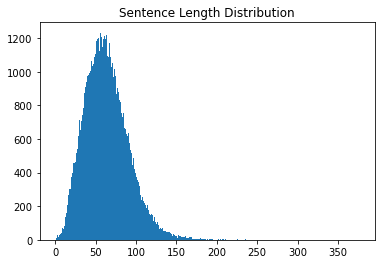

In [10]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

Q. 모든 데이터를 다 쓸것이냐? 
A. padding 생성할 거면 제일 긴 길이의 데이터를 기준으로 padding이 이루어진다. 너무 비효율적이다. 
Q. 그럼 길이별로 미니배치를 생성하는건 어떤가?
A. 길이에 따라 배치를 생성하면 편향성이 생길 수 있다. 

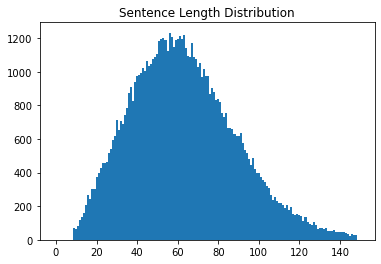

In [11]:
# 너무 짧거나 너무 긴 데이터들을 날리자
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

## 1. 데이터 준비
```
$ wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
$ wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
$ mv ratings_*.txt ~/aiffel/sentiment_classification
```

In [12]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from konlpy.tag import Okt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter

# 데이터를 읽어봅시다. 
train_data = pd.read_table('~/aiffel/sentiment_classification/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [13]:
def analyze_sentences(raw) :
    max_len=0
    min_len=999 
    sum_len=0
    for sen in raw:
        if type(sen) != type("") :
            continue
        length = len(sen)
        #print(length)
        #print(type(sen))
        #break
        if min_len > length: min_len = length
        if max_len < length: max_len = length
        sum_len += length

    print("문장의 최단 길이:", min_len)
    print("문장의 최장 길이:", max_len)
    print("문장의 평균 길이:", sum_len // len(raw))

    sentence_length = np.zeros((max_len), dtype=np.int)

    for sen in raw:
        if type(sen) != type("") :
            continue
        sentence_length[len(sen)-1] += 1

    plt.bar(range(max_len), sentence_length, width=1.0)
    plt.title("Sentence Length Distribution")
    plt.show()

In [14]:
train_data['document'].values.tolist()[:5]

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다']

문장의 최단 길이: 1
문장의 최장 길이: 146
문장의 평균 길이: 35


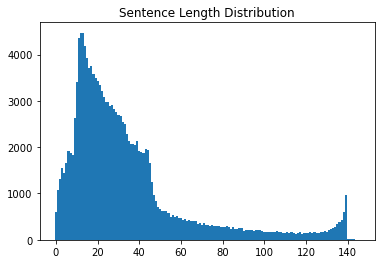

In [15]:
train_data_doc = train_data['document'].values.tolist()
train_data_doc = [x for x in train_data_doc if type(x) == type("")]

analyze_sentences(train_data_doc)

In [16]:
len(train_data_doc)

149995

In [ ]:
target = check_sentence_with_length(train_data_doc, 1)
if len(target) < 10 :
    print(target)
else :
    print(target[:5])

In [ ]:
target = check_sentence_with_length(train_data_doc, 146)
if len(target) < 10 :
    print(target)
else :
    print(target[:5])

길이가 146인 데이터도 의미가 있긴 하지만, 분포를 균일하게 하는 것이 목표이기 때문에 이를 제거하자. 

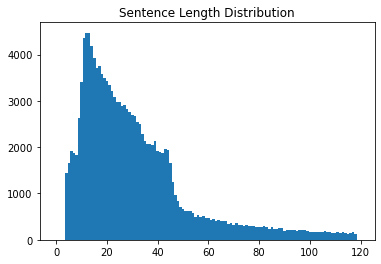

In [17]:
# 너무 짧거나 너무 긴 데이터들을 날리자
max_len = 120
min_len = 5

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in train_data_doc if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [18]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

## 2. Tokenizer 준비

In [19]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park_spe.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*


-rw-r--r-- 1 aiffel-dj15 aiffel-dj15 375179  4월 18 21:35 korean_spm_bpe.model
-rw-r--r-- 1 aiffel-dj15 aiffel-dj15 144638  4월 18 21:35 korean_spm_bpe.vocab
-rw-r--r-- 1 aiffel-dj15 aiffel-dj15 375178  4월 20 15:25 korean_spm.model
-rw-r--r-- 1 aiffel-dj15 aiffel-dj15 144638  4월 20 15:25 korean_spm.vocab


아까 만든 SentencePiece기반 토크나이저를 불러서 토큰화하는 함수를 정의해보자. 
해당 함수의 파라미터에는 `잘게 부셔진 문장`이 아닌 `문장 자체`가 들어간다.

아까 학습시킨 모델을 로드하고, 이를 통해 tensor, word index와 index word를 생성한다. 

In [21]:
t_lb = pd.DataFrame(train_data['label'])
t_lb.describe()

,label
count,150000.000000
mean,0.498847
std,0.500000
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [22]:
from tensorflow.keras.initializers import Constant
import gensim

테스트 데이터를 정제하기 위해 최대 최소 길이를 먼저 알아보고 걸러준다. 

문장의 최단 길이: 1
문장의 최장 길이: 144
문장의 평균 길이: 35


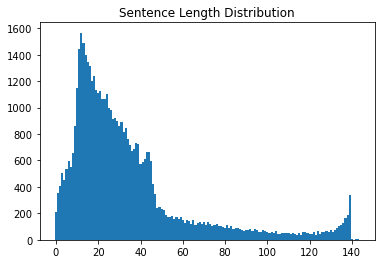

In [23]:
analyze_sentences(test_data['document'].values.tolist())

테스트 데이터의 분포도도 학습 데이터와 비슷해서 똑같은 길이로 잘라줬다. 

null을 포함한 행도 지워준다. 

In [74]:
train_data.drop_duplicates(subset=['document'], inplace=True)
test_data.drop_duplicates(subset=['document'], inplace=True)
#train_data['document'] = train_data['document'][train_data['document'].apply(lambda x: True  if type(x) == type("") and 5 <= len(x) <= 120 else False)]

In [75]:
train_data = train_data.dropna(how = 'any')
test_data = test_data.dropna(how = 'any')
train_data.drop_duplicates(['document'])
test_data.drop_duplicates(['document'])

,id,document,label
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
5,7898805,"음악이 주가 된, 최고의 음악영화",1
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [76]:
print(len(train_data),len(test_data))

122534 46427


In [65]:
total = 138562
count = 0
bins = np.arange(2,144,(144-2)/10)
train_data_only_sen = train_data['document'].values.tolist()
train_data_lens = [len(x) for x in train_data_only_sen]
#train_data_only_sen.sort(key=len)
hist, bins = np.histogram(train_data_lens, bins)
for i, v in enumerate(hist) :
    count += hist[i]
    print(count/total, hist[i], bins[i])

0.25206766645977974 34927 2.0
0.5757061820701203 44844 16.2
0.7977223192505882 30763 30.4
0.8843261500267029 12000 44.599999999999994
0.925939290714626 5766 58.8
0.9570950188363332 4317 73.0
0.9784572970944415 2960 87.19999999999999
0.9949048079560052 2279 101.39999999999999
1.0 706 115.6


In [77]:
def get_hist(data, minlen, maxlen) :
    total_len = len(data)
    count = 0
    bins = np.arange(minlen, maxlen, (maxlen-minlen)/10)
    data_lens = [len(x) for x in data]
    hist, bins = np.histogram(data_lens, bins)
    for i, v in enumerate(hist) :
        count += hist[i]
        print(count/total_len, hist[i], bins[i])
    return hist, bins

In [83]:
train_data_trimmed = train_data['document'][train_data['document'].apply(lambda x: True  if type(x) == type("s") and 2 <= len(x) <= 58 else False)].values.tolist()
train_data_label_trimmed = train_data['label'][train_data['document'].apply(lambda x: True  if type(x) == type("s") and 2 <= len(x) <= 58 else False)].values.tolist()

122534


In [78]:
get_hist(test_data['document'].values.tolist(), 2, 144)

0.25519632972192907 11848 2.0
0.5791888340836151 15042 16.2
0.7975100695715855 10136 30.4
0.8840329980399336 4017 44.599999999999994
0.9250005384797639 1902 58.8
0.9583216662717815 1547 73.0
0.9794946905895277 983 87.19999999999999
0.9944859672173519 696 101.39999999999999
1.0 256 115.6


(array([11848, 15042, 10136,  4017,  1902,  1547,   983,   696,   256]),
 array([  2. ,  16.2,  30.4,  44.6,  58.8,  73. ,  87.2, 101.4, 115.6,
        129.8]))

In [84]:
test_data_trimmed = test_data['document'][test_data['document'].apply(lambda x: True  if type(x) == type("s") and 2 <= len(x) <= 73 else False)].values.tolist()
test_data_label_trimmed = test_data['label'][test_data['document'].apply(lambda x: True  if type(x) == type("s") and 2 <= len(x) <= 73 else False)].values.tolist()

In [81]:
print(len(train_data_trimmed), len(test_data_trimmed))

122534 43081


['아 더빙.. 진짜 짜증나네요 목소리', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '너무재밓었다그래서보는것을추천한다', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.']


In [27]:
for i in train_data['document'].values.tolist() :
    try : len(i)
    except : 
        print(i, type(i))

## 3. 모델 학습시키기

In [91]:
def sp_tokenize(s, corpus, maxlen):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre',maxlen = maxlen)

    return tensor, word_index, index_word

In [92]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')
train_tensor, train_word_index, train_index_word = sp_tokenize(s, train_data_trimmed, 58)
test_tensor, test_word_index, test_index_word = sp_tokenize(s, test_data_trimmed, 73)

In [98]:
print(type(train_data_label_trimmed))

<class 'list'>


In [29]:
import matplotlib.pyplot as plt

def draw_chart(history_dict) :
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo"는 "파란색 점"입니다
    plt.plot(epochs, loss, 'bo', label='Training loss')
    # b는 "파란 실선"입니다
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    plt.clf()   # 그림을 초기화합니다

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [134]:
vocab_size = 20000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 200  # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model3 = keras.Sequential()
model3.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model3.add(keras.layers.GlobalMaxPooling1D())
model3.add(keras.layers.Dense(8, activation='relu'))
model3.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model3.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, None, 200)         4000000   
_________________________________________________________________
global_max_pooling1d_12 (Glo (None, 200)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 1608      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 9         
Total params: 4,001,617
Trainable params: 4,001,617
Non-trainable params: 0
_________________________________________________________________


In [137]:
import numpy as np

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('best_model_basic1.h5', monitor='val_loss', mode='min', save_best_only=True)


model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs = 10
history3 = model3.fit(train_tensor,
                    np.array(train_data_label_trimmed),
                    epochs=epochs,
                    batch_size=512,
                    validation_split = 0.2,
                    callbacks = [es,mc])

Epoch 1/10
192/192 [==============================] - 8s 38ms/step - loss: 0.6273 - accuracy: 0.7001 - val_loss: 0.3632 - val_accuracy: 0.8451
Epoch 2/10
192/192 [==============================] - 7s 38ms/step - loss: 0.3182 - accuracy: 0.8670 - val_loss: 0.3364 - val_accuracy: 0.8527
Epoch 3/10
192/192 [==============================] - 7s 37ms/step - loss: 0.2563 - accuracy: 0.8970 - val_loss: 0.3427 - val_accuracy: 0.8533
Epoch 00003: early stopping


In [138]:
results = model3.evaluate(test_tensor, np.array(test_data_label_trimmed), verbose=2)

1347/1347 - 2s - loss: 0.3501 - accuracy: 0.8493


막간의 보너스 : 구간을 지정해서 validation set을 넣어준다면?

In [125]:
train_data_label_trimmed = np.array(train_data_label_trimmed)
x_val = train_data_trimmed[len(train_data_trimmed)//2:]
y_val = train_data_label_trimmed[train_data_label_trimmed.shape[0]//2:]
partial_x_train = train_data_trimmed[:len(train_data_trimmed)//2]
partial_y_train = train_data_label_trimmed[:train_data_label_trimmed.shape[0]//2]

In [126]:
p_train_tensor, p_train_word_index, p_train_index_word = sp_tokenize(s, partial_x_train, 58)
val_tensor, val_word_index, val_index_word = sp_tokenize(s, x_val,73)

In [131]:
vocab_size = 20000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 200  # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model4 = keras.Sequential()
model4.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model4.add(keras.layers.GlobalMaxPooling1D())
model4.add(keras.layers.Dense(8, activation='relu'))
model4.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model4.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, None, 200)         4000000   
_________________________________________________________________
global_max_pooling1d_11 (Glo (None, 200)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 1608      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 9         
Total params: 4,001,617
Trainable params: 4,001,617
Non-trainable params: 0
_________________________________________________________________


In [132]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('best_model_basic.h5', monitor='val_loss', mode='min', save_best_only=True)


model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs = 10
history4 = model4.fit(p_train_tensor,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(val_tensor, y_val),
                    callbacks=[es, mc])

Epoch 1/10
120/120 [==============================] - 6s 46ms/step - loss: 0.6558 - accuracy: 0.7010 - val_loss: 0.4387 - val_accuracy: 0.8235
Epoch 2/10
120/120 [==============================] - 5s 45ms/step - loss: 0.3655 - accuracy: 0.8579 - val_loss: 0.3555 - val_accuracy: 0.8425
Epoch 3/10
120/120 [==============================] - 6s 47ms/step - loss: 0.2605 - accuracy: 0.8971 - val_loss: 0.3578 - val_accuracy: 0.8441
Epoch 00003: early stopping


In [133]:
results = model4.evaluate(test_tensor, np.array(test_data_label_trimmed), verbose=2)

1347/1347 - 2s - loss: 0.3585 - accuracy: 0.8452


뚜렷한 정확도 증가는 일어나지 않았다. 
그렇다 쳐도 konlpy를 썼을 때(단순한 모델 + 임베딩 사용) 과 비슷한 수준의 정확도를 보여주어 매우 효율적으로 단어장을 생성했음을 알 수 있다. 
이에 추가적인 성능 개선을 위해 LSTM을 쓰겠다.

## 추가 

### Tokenizer with bpe

In [112]:
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park-spm-bpe.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm_bpe --vocab_size={} --model_type=bpe'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm_bpe*

-rw-r--r-- 1 aiffel-dj15 aiffel-dj15 370595  4월 20 22:41 korean_spm_bpe.model
-rw-r--r-- 1 aiffel-dj15 aiffel-dj15 115801  4월 20 22:41 korean_spm_bpe.vocab


In [113]:
def sp_tokenize_bpe(s, corpus, maxlen):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm_bpe.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre',maxlen=maxlen)

    return tensor, word_index, index_word

In [139]:
s2 = spm.SentencePieceProcessor()
s2.Load('korean_spm_bpe.model')
train_tensor2, train_word_index2, train_index_word2 = sp_tokenize_bpe(s, train_data_trimmed, 58)
test_tensor2, test_word_index2, test_index_word2 = sp_tokenize_bpe(s, test_data_trimmed, 73)

In [140]:
model6 = keras.Sequential()
model6.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model6.add(keras.layers.GlobalMaxPooling1D())
model6.add(keras.layers.Dense(8, activation='relu'))
model6.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model6.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, None, 200)         4000000   
_________________________________________________________________
global_max_pooling1d_13 (Glo (None, 200)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 1608      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 9         
Total params: 4,001,617
Trainable params: 4,001,617
Non-trainable params: 0
_________________________________________________________________


In [141]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('best_model_bpe.h5', monitor='val_loss', mode='min', save_best_only=True)

model6.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs = 10
history6 = model6.fit(train_tensor2,
                    train_data_label_trimmed,
                    epochs=epochs,
                    validation_split = 0.2,
                    callbacks = [es,mc],
                    batch_size=512)

Epoch 1/10
192/192 [==============================] - 8s 38ms/step - loss: 0.6206 - accuracy: 0.6760 - val_loss: 0.3637 - val_accuracy: 0.8469
Epoch 2/10
192/192 [==============================] - 7s 38ms/step - loss: 0.3162 - accuracy: 0.8702 - val_loss: 0.3378 - val_accuracy: 0.8529
Epoch 3/10
192/192 [==============================] - 7s 39ms/step - loss: 0.2510 - accuracy: 0.9013 - val_loss: 0.3453 - val_accuracy: 0.8519
Epoch 00003: early stopping


In [144]:
results = model6.evaluate(test_tensor2, np.array(test_data_label_trimmed), verbose=2)

1347/1347 - 2s - loss: 0.3543 - accuracy: 0.8486


정확도에 있어서 거의 차이가 없다!

### Model training with LSTM

In [145]:
model5 = keras.Sequential()
model5.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model5.add(keras.layers.LSTM(128))
model5.add(keras.layers.Dense(128, activation='relu'))
model5.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model5.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, None, 200)         4000000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_36 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 129       
Total params: 4,185,089
Trainable params: 4,185,089
Non-trainable params: 0
_________________________________________________________________


In [146]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('best_model_bpe.h5', monitor='val_loss', mode='min', save_best_only=True)

model5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs = 10
history5 = model5.fit(train_tensor2,
                    train_data_label_trimmed,
                    epochs=epochs,
                    batch_size=512,
                    validation_split = 0.2,
                    callbacks = [es, mc]
                    )

Epoch 1/10
192/192 [==============================] - 10s 46ms/step - loss: 0.5138 - accuracy: 0.7351 - val_loss: 0.3504 - val_accuracy: 0.8468
Epoch 2/10
192/192 [==============================] - 9s 47ms/step - loss: 0.3124 - accuracy: 0.8661 - val_loss: 0.3402 - val_accuracy: 0.8503
Epoch 3/10
192/192 [==============================] - 9s 49ms/step - loss: 0.2767 - accuracy: 0.8793 - val_loss: 0.3498 - val_accuracy: 0.8484
Epoch 00003: early stopping


In [149]:
results = model5.evaluate(test_tensor2, np.array(test_data_label_trimmed), verbose=2)

1347/1347 - 3s - loss: 0.3603 - accuracy: 0.8454


**모델 학습시 텍스트 길이는 매우 중요하다.**
현재까지 학습한 모델은 텍스트 최고 길이를 train시 58, test시 73으로 두었다. 
하지만 이 전에 시도한 모델은 텍스트 최고 길이를 120으로 두었다. 
이 경우 LSTM 모델의 정확도가 0.5로 나오는 일이 있었다.
RNN 계열 모델은 텍스트 길이에 민감하게 반응하는 것을 간과한 탓이다. 

# 결론

이전의 konlpy의 결과와 비교하겠다. 
```
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
embedding_4 (Embedding)      (None, 41, 100)           2000000   
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 808       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
=================================================================
Total params: 2,000,817
Trainable params: 2,000,817
Non-trainable params: 0
```
위와 같이 모델을 구성했고 결과는 0.82의 정확도를 보였다. 그리고 maxpooling과 LSTM 각각을 사용한 모델과 비교하면 sentencepieces 토크나이저를 쓴 경우가 아무리 못해도 0.83의 정확도를 보이며 높은 효율을 보여줬다. 
높은 효율이라고 결론낸 이유를 서술하겠다. 
1. konlpy는 말뭉치를 업로드 -> 임베딩 매트릭스를 사용하기 위한 전처리 / sentencepieces는 입력 데이터 기반으로 토큰화 시도 => 시공간 비용이 전자가 높음